In [1]:
from fastai.text import *
import html
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from src.text_tools import natural_sort

In [7]:
BOS = 'xbos'  # beginning-of-sentence tag
FLD = 'xfld'  # data field tag
PATH = Path('/data/smith-monuments-sentiment')
CLAS_PATH=Path(PATH/'data')
CLAS_PATH.mkdir(exist_ok=True)

In [8]:
ds = pd.read_csv(PATH/'data/Master_monuments_comments_v0_2.csv')
test_ids = ['DOI-2017-0002-%s'%i for i in range(9900,9999)]
df_test = ds.set_index('id').loc[test_ids]
ds = ds.set_index('id').drop(test_ids)
ds = ds.reset_index()

In [72]:
np.unique(ds[['comment', 'investigator']].dropna().investigator)

array(['?', 'BB', 'BM', 'CM', 'ESD', 'GW', 'KEI', 'MAH', 'MAN', 'MB', 'MWT', 'PE', 'SBB', 'SK', 'SNN',
       'SSBB', 'TC', 'cmm', 'jbk', 'maN'], dtype=object)

In [57]:
#here, let's add the additional ~500 comments from the previous model outputs 

In [58]:
ds = ds[['id','sentiment','comment']].rename(index=str, columns={'sentiment':'labels','comment':'text'})

In [59]:
add_df = pd.read_csv(PATH/'output/neg_comments_v1_1.csv',\
                     header=None)

In [60]:
#add_df = add_df.iloc[:,:3]
add_df= add_df.rename(index=str, columns={0:'id',2:'labels',1:'text'})

In [61]:
ds = pd.concat([ds,add_df], ignore_index=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [62]:
df_test.sentiment = df_test.sentiment.astype(int)
df_test = df_test.reset_index()
df_test = df_test[['id','sentiment','comment']].rename(index=str, columns={'sentiment':'labels',\
                                                                       'comment':'text'})

In [63]:
df_test[['labels','text']].to_csv(CLAS_PATH/'ind_test.csv', header=False, index=False)

In [64]:
ds = (ds[~np.isnan(ds.labels)])
ds.labels = ds.labels.astype(int)
comment_list = np.array([c for c in ds.text])
ucomment, uix = np.unique(comment_list, return_index=True)
# only select unique comments
uniq_ds = ds.iloc[uix]

In [65]:
df = uniq_ds

In [66]:
df = natural_sort(df, 'id')

In [67]:
df_trn, df_val = train_test_split(df, test_size=0.1, random_state=123)

Text(0, 0.5, 'Count')

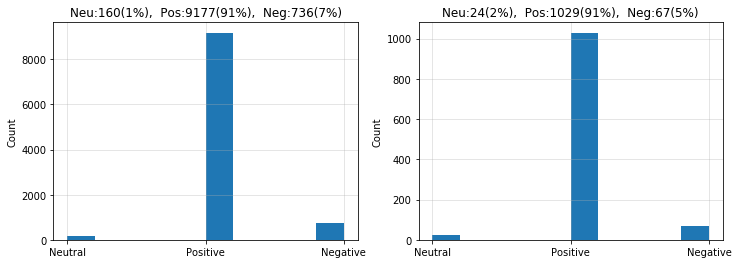

In [68]:
f, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(df_trn.labels)
lcs = [len(df_trn[df_trn.labels==i]) for i in range(3)]
lcp = (np.array(lcs)/len(df_trn)*100).astype(int)
ax[0].set_title('Neu:%i(%i%%),  Pos:%i(%i%%),  Neg:%i(%i%%)'\
                %(lcs[0],lcp[0],lcs[1],lcp[1],lcs[2],lcp[2]))
ax[0].grid(alpha=0.4)
ax[0].set_xticks(np.arange(3))
ax[0].set_xticklabels(['Neutral', 'Positive', 'Negative'])
ax[0].set_xlabel('')
ax[0].set_ylabel('Count')
lcs = [len(df_val[df_val.labels==i]) for i in range(3)]
lcp = (np.array(lcs)/len(df_val)*100).astype(int)
ax[1].hist(df_val.labels)
ax[1].set_xticks(np.arange(3))
ax[1].set_xticklabels(['Neutral', 'Positive', 'Negative'])
ax[1].set_title('Neu:%i(%i%%),  Pos:%i(%i%%),  Neg:%i(%i%%)'\
                %(lcs[0],lcp[0],lcs[1],lcp[1],lcs[2],lcp[2]))
ax[1].grid(alpha=0.4)
ax[1].set_ylabel('Count')

In [69]:
df_trn.to_csv(CLAS_PATH/'train_with_idx.csv', header=False, index=False)
df_val.to_csv(CLAS_PATH/'test_with_idx.csv', header=False, index=False)
df_trn[['labels','text']].to_csv(CLAS_PATH/'train.csv', header=False, index=False)
df_val[['labels','text']].to_csv(CLAS_PATH/'test.csv', header=False, index=False)